In [1]:
setwd('/Users/alexis/Library/CloudStorage/OneDrive-UniversityofNorthCarolinaatChapelHill/CEMALB_DataAnalysisPM/Projects/P1002. Ecig Metabolomics NELF/P1002.3. Analyses/P1002.3.4. ML Visualizations/P1002.3.4.2 Decision Boundary Plot/Input')
Output = ('/Users/alexis/Library/CloudStorage/OneDrive-UniversityofNorthCarolinaatChapelHill/CEMALB_DataAnalysisPM/Projects/P1002. Ecig Metabolomics NELF/P1002.3. Analyses/P1002.3.4. ML Visualizations/P1002.3.4.2 Decision Boundary Plot/Output')
cur_date = "050522"

library(readxl)
library(reshape2)
library(tidyverse)
library(randomForest)
library(gganimate)
library(mvnfast)
library(MetBrewer)
library(ggrepel)

#reading in file
molecular_feature_df_w_Ecig_40 = read_csv("20220217_mf_qrilc_w40.csv") %>%
     rename(Smoking_Status = sample)
demographics_df = data.frame(read_excel("SubjectInfo_022822.xlsx", sheet = 2))

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

randomForest 4.7-1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin


No renderer backend detected. gganimate will default to writing frames to separate files
Consider installing:
- the `gifski` package for gif output
- the `av` package for video output
and restarting the R session

Rows: 59 Columns: 3873
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr    (1): sample
dbl (3872): MF

In [2]:
head(molecular_feature_df_w_Ecig_40)
head(demographics_df)

Smoking_Status,MF_2,MF_3,MF_4,MF_5,MF_6,MF_7,MF_11,MF_12,MF_13,⋯,MF_62853,MF_63431,MF_63701,MF_64025,MF_64936,MF_65532,MF_68286,MF_73340,MF_77165,MF_78976
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NS_070,19.86186,17.86943,19.21394,18.02809,17.46636,18.34174,18.41799,19.31361,19.46777,⋯,19.06974,19.10260,17.17255,16.92465,17.09794,19.06203,19.13556,16.93182,17.55702,17.05593
NS_110,21.08622,22.58769,21.05378,17.93584,17.33098,20.41479,20.37485,21.12876,21.01488,⋯,18.02560,17.82667,19.37426,16.23450,19.06421,18.06379,19.39103,16.72112,19.27343,19.30881
NS_143,13.12099,14.44659,13.46827,16.51009,14.93820,15.66299,15.72731,13.78698,15.18975,⋯,19.14095,19.02411,19.56175,17.17120,16.97302,19.49121,17.09470,15.56214,19.55038,19.54912
NS_152,21.60361,23.22761,21.99010,16.22547,17.59020,21.53908,21.14531,22.07857,21.97502,⋯,19.28751,19.54886,16.78848,16.46750,19.47635,19.44477,16.99617,16.09531,19.28810,19.32788
NS_187,19.43885,17.93876,19.68977,16.73360,17.88844,17.81758,17.64979,19.64269,19.32233,⋯,16.70042,17.85969,18.97406,18.18813,18.50336,19.19085,19.41757,16.88993,19.35678,18.95550
NS_196,22.53459,24.36662,22.77595,16.69956,16.38411,22.55912,17.30008,22.80146,22.09338,⋯,16.86999,15.82637,19.46467,16.97149,17.46699,16.32598,15.62938,17.37207,15.84334,17.82000


,Original_SubjectID,SubjectID,Exposure,Sex,Race,Age,BMI
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,CA41,Ecig_41,Ecig,F,B,18,20.5
2,NBL214,Ecig_214,Ecig,F,O,19,20.9
3,NBL223,Ecig_223,Ecig,F,B,19,19.9
4,CA44,Ecig_44,Ecig,F,W,19,19.8
5,CA45,Ecig_45,Ecig,F,W,19,21.4
6,CA48,Ecig_48,Ecig,F,W,19,20.8


In [3]:
# creating 1 df
sex_df = demographics_df %>%
    select(c("SubjectID", "Sex")) %>%
    rename(Smoking_Status = SubjectID)

#first making smoking status column binary denoted by 0 = non smoker and 1 = ecig user
mf_df = full_join(sex_df, molecular_feature_df_w_Ecig_40) %>%
    #grepl is synonymous with "contains"
    #necessary to put it into factor and relevel, so algorithm understands which data is considered baseline
    mutate(Smoking_Status = relevel(factor(ifelse(grepl("Ecig", Smoking_Status), 1, 0)), ref = "0"),
          Sex = relevel(factor(ifelse(Sex == "M", 1, 0)), ref = "0"))

head(mf_df)

Joining, by = "Smoking_Status"


,Smoking_Status,Sex,MF_2,MF_3,MF_4,MF_5,MF_6,MF_7,MF_11,MF_12,⋯,MF_62853,MF_63431,MF_63701,MF_64025,MF_64936,MF_65532,MF_68286,MF_73340,MF_77165,MF_78976
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0,17.97114,16.57668,18.16231,17.98408,17.84075,17.69319,15.10571,17.92538,⋯,16.58944,19.10873,19.29095,16.90081,16.35469,18.95356,16.09442,17.66969,18.81267,18.47152
2,1,0,20.95330,21.69571,20.65056,21.89841,17.48492,20.32206,19.86974,20.76839,⋯,19.28804,19.28720,19.50373,18.00832,18.27601,17.03340,18.93808,18.98799,18.67967,18.27810
3,1,0,22.92114,24.83565,23.21817,21.58997,17.88701,23.46244,22.49399,23.15348,⋯,16.74502,19.10796,18.55441,18.27226,18.45050,19.35907,19.55371,16.48129,19.43559,18.76511
4,1,0,21.50863,24.00915,22.24477,16.08028,25.83361,21.97463,16.25518,22.20582,⋯,16.94663,19.44397,17.73094,19.33015,17.91842,17.85727,14.89089,17.36997,14.75725,17.02506
5,1,0,20.58515,21.84892,20.58270,21.31732,16.64876,20.45721,20.21958,20.49126,⋯,19.44524,16.90630,18.21579,15.91343,16.19104,18.06466,19.83840,19.47262,19.30346,19.14218
6,1,0,20.75884,17.60193,19.94664,19.94857,17.50820,19.47224,19.18916,19.98346,⋯,19.27650,17.47114,18.68055,17.60442,18.29944,19.24688,17.24988,19.08287,17.34054,16.67967


In [4]:
#random forest model
df1 = data.frame(mf_df[,c("MF_97", "MF_5", "Smoking_Status")])
df2 = data.frame(mf_df[,c("MF_292", "MF_8500", "Smoking_Status")])

# setting seed for reproducibility 
set.seed(7)

rf_model1 = randomForest(Smoking_Status~., data = df1)
rf_model2 = randomForest(Smoking_Status~., data = df2)

In [5]:
#obtaining grid values and predictions visualize using ggplot
get_grid_df <- function(model, data, class = NULL, predict_type = "class", 
  resolution = 100, showgrid = TRUE, ...) {

  #plotting original data
  if(!is.null(class)) cl <- data[,class] else cl <- 1
  data <- data[,1:2]
  k <- length(unique(cl))

  # make grid (between min and max for each variable)
  r <- sapply(data, range, na.rm = TRUE)
  xs <- seq(r[1,1], r[2,1], length.out = resolution)
  ys <- seq(r[1,2], r[2,2], length.out = resolution)
  g <- cbind(rep(xs, each=resolution), rep(ys, time = resolution))
  colnames(g) <- colnames(r)
  g <- as.data.frame(g)
    
  ### guess how to get class labels from predict
  ### (unfortunately not very consistent between models)
  p <- predict(model, g, type = predict_type)
  g$Pred_Class = p
    
  return(g)
}


grid_df1 = get_grid_df(rf_model1, df1, class = "Smoking_Status")
grid_df2 = get_grid_df(rf_model2, df2, class = "Smoking_Status")
head(grid_df1)
head(grid_df2)

,MF_97,MF_5,Pred_Class
,<dbl>,<dbl>,<fct>
1,15.21968,14.68317,0
2,15.21968,14.83573,0
3,15.21968,14.98828,0
4,15.21968,15.14084,0
5,15.21968,15.29340,0
6,15.21968,15.44595,0


,MF_292,MF_8500,Pred_Class
,<dbl>,<dbl>,<fct>
1,14.2355,15.41855,0
2,14.2355,15.49396,0
3,14.2355,15.56937,0
4,14.2355,15.64478,0
5,14.2355,15.72019,0
6,14.2355,15.79560,0


# Version 1

a. Plotted 2 most important variables (nicotine and cotinine) from random forest models on tobacco product use prediction. 

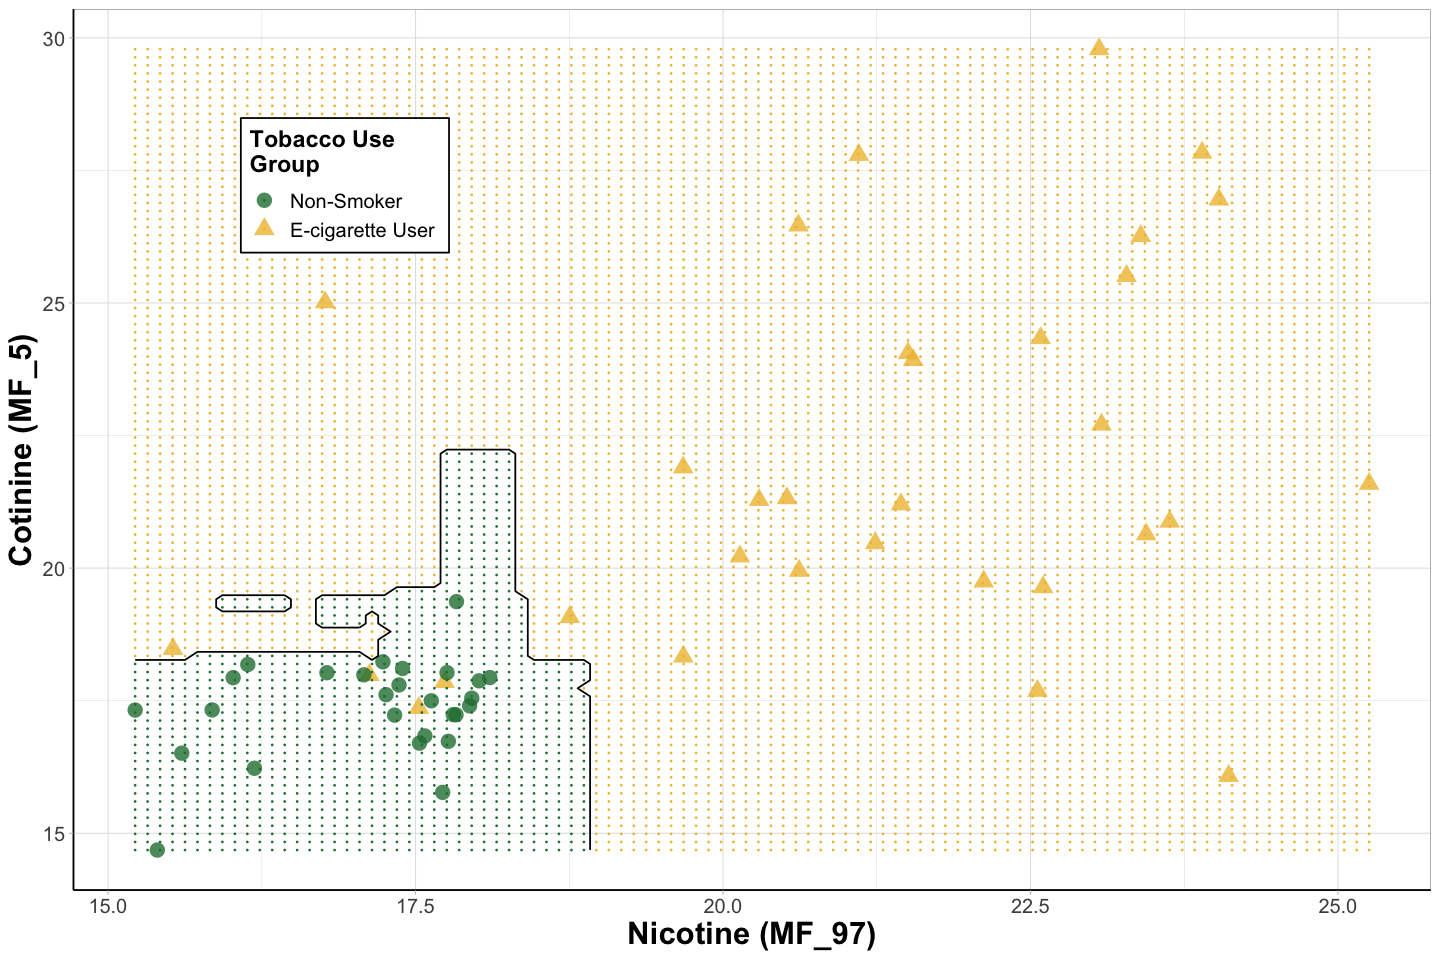

In [6]:
options(repr.plot.width=12, repr.plot.height=8) #changing size

#choosing palette from package
metbrewer_colors = MetPalettes$Lakota[[1]]

FigureX = ggplot() +
  geom_point(data = df1, aes(x = MF_97, y = MF_5, color = Smoking_Status, shape = Smoking_Status),
            size = 4, alpha = 0.8) + 
  geom_contour(data = grid_df1, aes(x = MF_97, y = MF_5, z = as.numeric(Pred_Class == "1")), color = "black", 
               breaks = 0.5) + #adds contour line
  geom_point(data = grid_df1, aes(x = MF_97, y = MF_5, color = Pred_Class), size = 0.1) + #shades plot

  theme_light() + 
  theme(axis.line = element_line(colour = "black"), #making x and y axes black
        axis.text = element_text(size = 12), #changing size of x axis labels
        axis.title = element_text(face = "bold", size = rel(1.7)), #changes axis titles
        legend.title = element_text(face = 'bold', size = 14), #changes legend title
        legend.text = element_text(size = 12), #changes legend text
        legend.position = c(0.2,0.8), # move legend to top left corner
        legend.background = element_rect(colour = 'black', fill = 'white', linetype = 'solid'),
        strip.text.x = element_text(size = 15, face = "bold"), #changes size of facet x axis 
        strip.text.y = element_text(size = 15, face = "bold")) + #changes size of facet y axis 
  labs(x = 'Nicotine (MF_97)', y = 'Cotinine (MF_5)') + #changing axis labels 

  scale_color_manual(name = "Tobacco Use \nGroup",
                      values = c(metbrewer_colors[5], metbrewer_colors[2]),
                      labels = c('Non-Smoker','E-cigarette User')) + #reordering
  scale_shape_manual(name = "Tobacco Use \nGroup",
                     values = c(16,17),
                     labels = c('Non-Smoker','E-cigarette User'))

FigureX

b. Similar plot as above just showing what e-cig subjects are overlapping with non-smokers. 

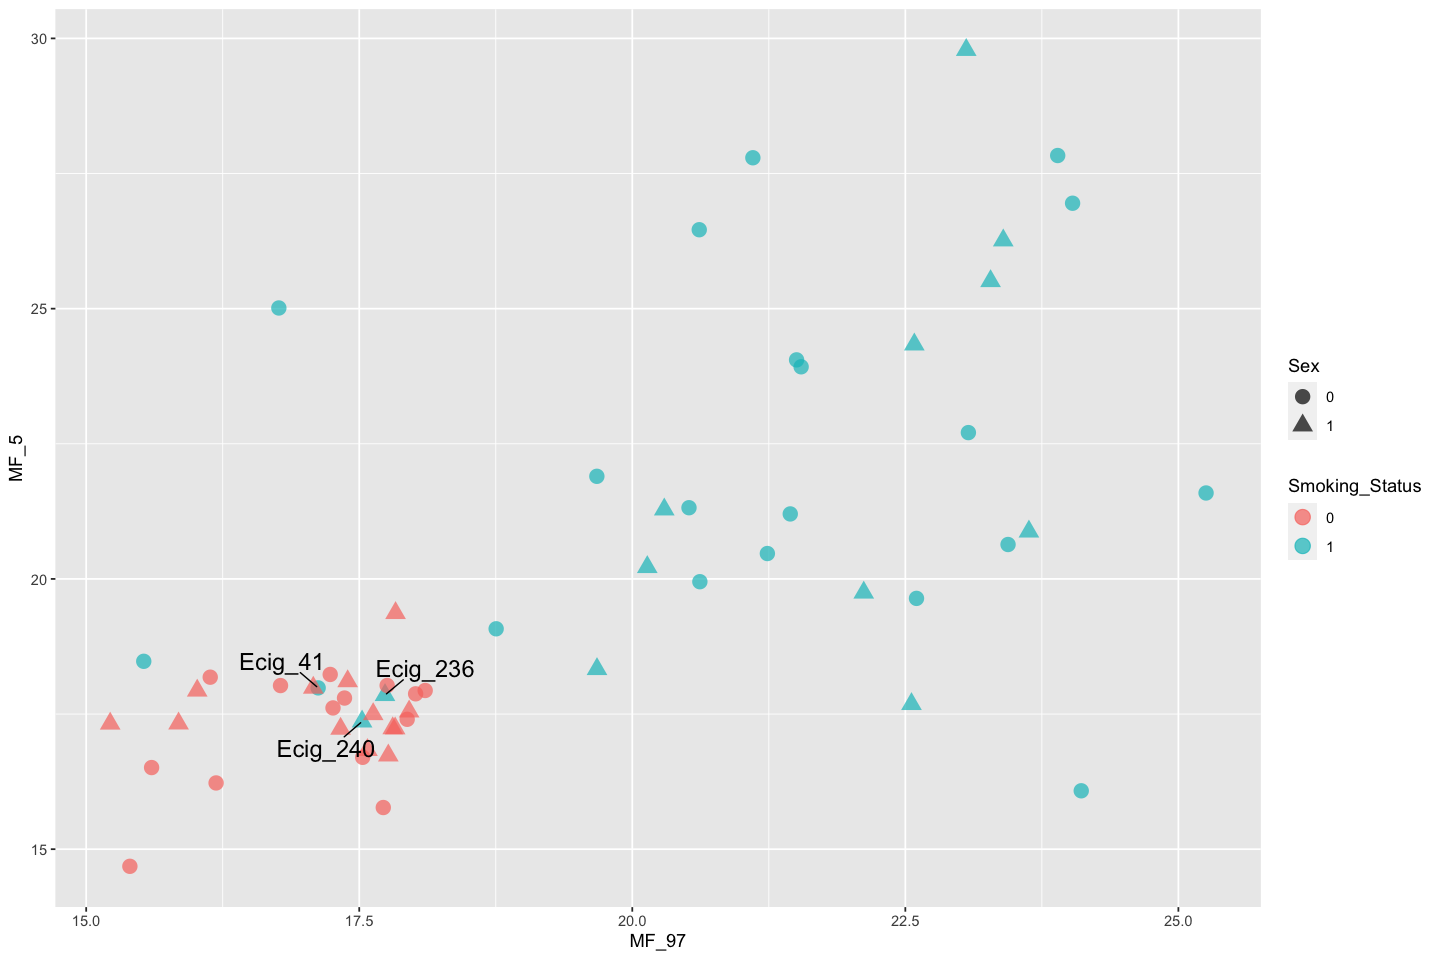

In [7]:
ggplot() +
  geom_point(data = mf_df, aes(x = MF_97, y = MF_5, color = Smoking_Status, shape = Sex), size = 4, alpha = 0.7) +
  geom_text_repel(data = molecular_feature_df_w_Ecig_40 %>%
                filter(grepl("Ecig", Smoking_Status), MF_97 < 18 & MF_5 < 18), aes(x = MF_97, y = MF_5, label = Smoking_Status),
                 size = 5, segment.size = 0.4, box.padding = 0.7) 

# Version 2

Plotted 2 most important variables (MF_292 and MF_8500) from random forest models on tobacco product use prediction when nictoine and cotinine weren't included as predictors. 

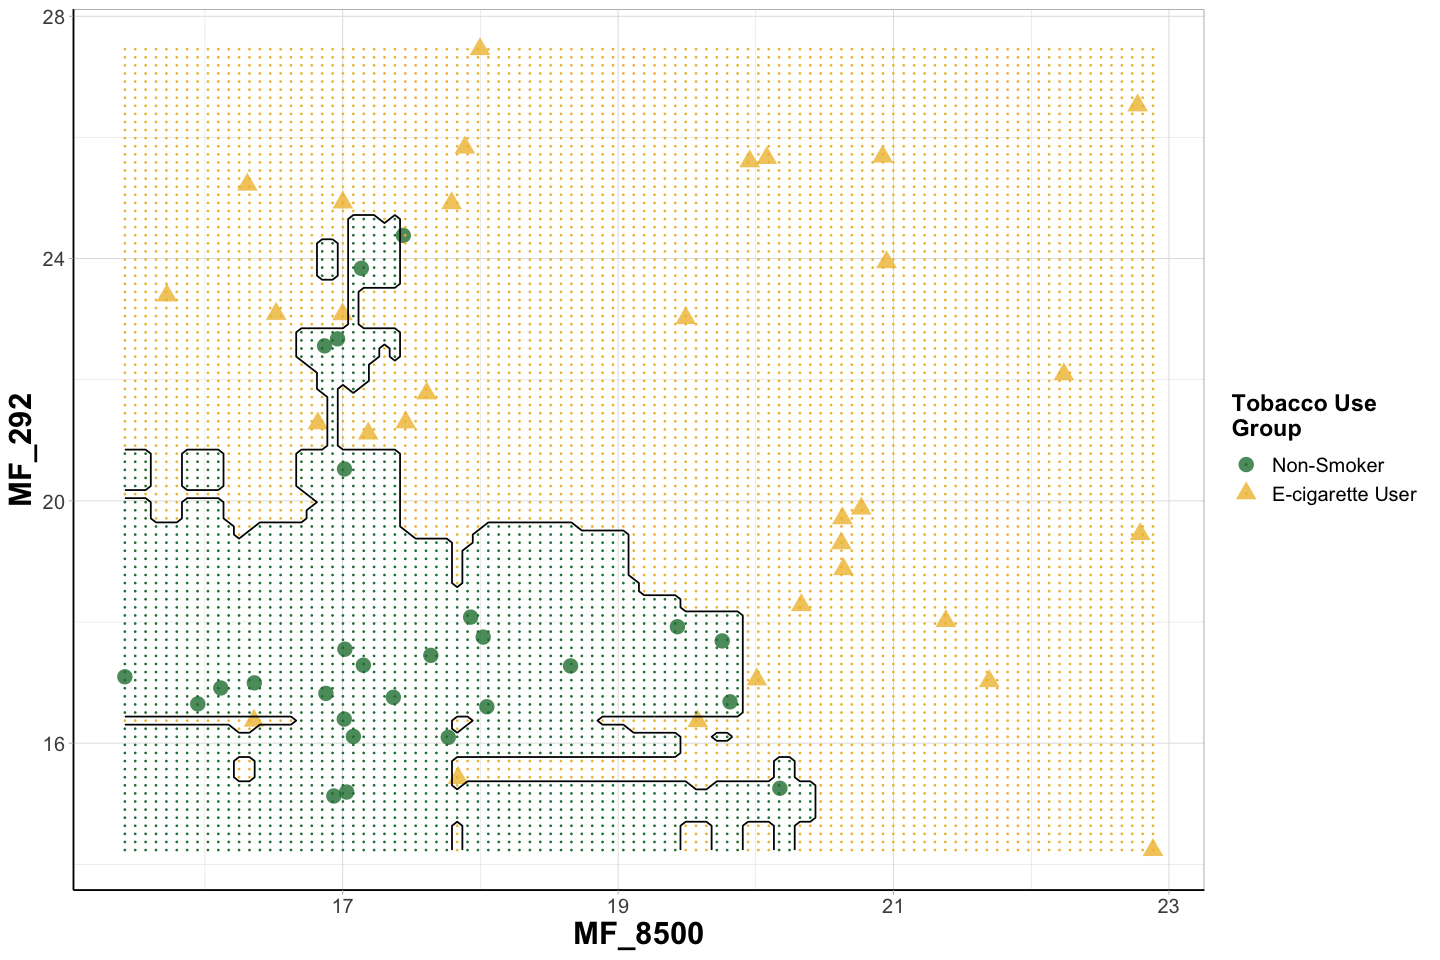

In [8]:
ggplot() +
  geom_point(data = df2, aes(x = MF_8500, y = MF_292, color = Smoking_Status, shape = Smoking_Status),
            size = 4, alpha = 0.8) + 
  geom_contour(data = grid_df2, aes(x = MF_8500, y = MF_292, z = as.numeric(Pred_Class == "1")), color = "black", 
               breaks = 0.5) + #adds contour line
  geom_point(data = grid_df2, aes(x = MF_8500, y = MF_292, color = Pred_Class), size = 0.1) + #shades plot

  theme_light() + 
  theme(axis.line = element_line(colour = "black"), #making x and y axes black
        axis.text = element_text(size = 12), #changing size of x axis labels
        axis.title = element_text(face = "bold", size = rel(1.7)), #changes axis titles
        legend.title = element_text(face = 'bold', size = 14), #changes legend title
        legend.text = element_text(size = 12), #changes legend text
        strip.text.x = element_text(size = 15, face = "bold"), #changes size of facet x axis 
        strip.text.y = element_text(size = 15, face = "bold")) + #changes size of facet y axis 
  labs(x = 'MF_8500', y = 'MF_292') + #changing axis labels 

  scale_color_manual(name = "Tobacco Use \nGroup",
                      values = c(metbrewer_colors[5], metbrewer_colors[2]),
                      labels = c('Non-Smoker','E-cigarette User')) + #reordering
  scale_shape_manual(name = "Tobacco Use \nGroup",
                     values = c(16,17),
                     labels = c('Non-Smoker','E-cigarette User'))

In [9]:
#exporting figure
ggsave(FigureX, 
       filename = 'FigureX.pdf',
       path = Output,
       width = 12, height = 8)